<a href="https://colab.research.google.com/github/sordib/exercicios_bootcamp_womakerscode/blob/main/challenge_semana3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Teste de Hipóteses**

##Integrantes do Squad Grace Hopper:


*   Aline Alvino
*   Bianca Sordi
*   Maitê S. Cuevas
*   Marina Arthur
*   Marina Neves
*   Mayara Reghin
*   Victória Viana
*   Wellen Nascimento


---

##Organização da Squad



*  Nos reunimos para discutir sobre o desafio

*  Compartilhamos o colab para deixar livre para todas colaborarem com o desafio

*  Nos reunimos após o desafio estar pronto para conversar sobre o que fizemos, revisar e ajustar

*  As integrantes Marina Arthur, Marina Neves, Victória e Wellen ficaram responsáveis pela apresentação





---

## Facilidades e dificuldades encontradas no desenvolvimento do desafio

**Facilidades:**

* Maitê tem uma grande experiencia com esse assunto e nos ajudou a entender melhor o desafio

* Trabalho em conjunto pelo Colab

* Houve uma melhora na nossa organização

* Dados Fornecidos

* Agora temos mais experiencia com análise exploratória



**Dificuldades:**

* Aplicar o teste para mais de duas condições

* Entender sobre estatistica (por fora) para aplicar ao desafio

* Interpretar os resultados obtidos



# **Importando bibliotecas e bases de dados**


In [ ]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [ ]:
# importando base de dados

dados = pd.read_csv('desafio_01_cosmeticos_challenge_testehipoteses230206120450-230911-094933.csv')

## **Conhecendo o dataset**

In [ ]:
# visualizar as primeiras linhas
dados.head()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
0,1,1,12,40,1
1,2,2,5,36,0
2,1,3,19,47,0
3,1,4,14,36,1
4,1,5,17,46,1


In [ ]:
# visualizar o número de linhas e colunas
dados.shape

(300, 5)

In [ ]:
#visualizar os tipos de dados
dados.dtypes

id_produto       int64
id_voluntária    int64
durabilidade     int64
idade            int64
exposicao_sol    int64
dtype: object

##**Análise exploratória do dataset**

In [ ]:
#resumo estatístico das variáveis numéricas
dados.describe()

,id_produto,id_voluntária,durabilidade,idade,exposicao_sol
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.000000,150.500000,17.133333,36.886667,0.440000
std,0.817861,86.746758,10.942945,12.625841,0.497216
min,1.000000,1.000000,5.000000,18.000000,0.000000
25%,1.000000,75.750000,9.000000,26.000000,0.000000
50%,2.000000,150.500000,14.000000,36.000000,0.000000
75%,3.000000,225.250000,20.000000,48.000000,1.000000
max,3.000000,300.000000,48.000000,60.000000,1.000000


In [ ]:
dados.dtypes

id_produto       int64
id_voluntária    int64
durabilidade     int64
idade            int64
exposicao_sol    int64
dtype: object

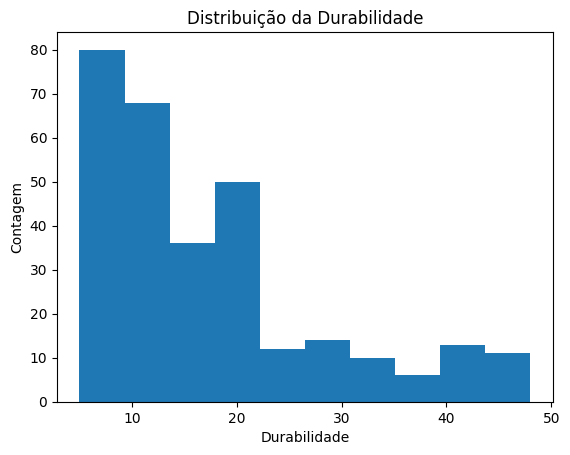

In [ ]:
#distribuição das variáveis

#histograma da durabildiade
plt.hist(dados['durabilidade'], bins=10)
plt.xlabel('Durabilidade')
plt.ylabel('Contagem')
plt.title('Distribuição da Durabilidade')
plt.show()

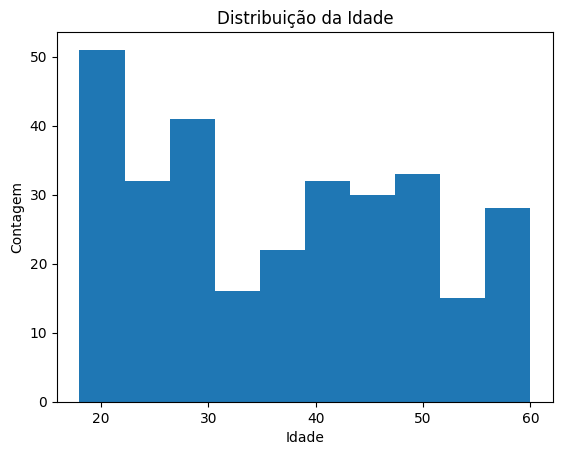

In [ ]:
#histograma da idade
plt.hist(dados['idade'], bins=10)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição da Idade')
plt.show()

In [ ]:
#media de durabilidade por id_produto

media_durabilidade_por_produto = dados.groupby('id_produto')['durabilidade'].mean()
media_durabilidade_por_produto

id_produto
1    15.11
2     7.77
3    28.52
Name: durabilidade, dtype: float64

In [ ]:
#media de durabilidade por exposição ao sol

media_durabilidade_por_exposicao = dados.groupby('exposicao_sol')['durabilidade'].mean()
media_durabilidade_por_exposicao

exposicao_sol
0    20.577381
1    12.750000
Name: durabilidade, dtype: float64

In [ ]:
# quantidade por id_produto

contagem_id_produtos = dados['id_produto'].value_counts().reset_index()
contagem_id_produtos.columns = ['id_produto', 'quantidade']

contagem_id_produtos

,id_produto,quantidade
0,1,100
1,2,100
2,3,100


# **Desafio 1: Cosméticos**

Suponha que você trabalha em uma empresa do ramo de cosméticos ou beleza. O
Time de produtos dessa empresa está interessado criar novos batons com maior
durabilidade. Para isso estão testando 3 diferentes fórmulas para irem a mercado.

O time de produtos solicitou aos analistas de dados da
empresa as seguintes perguntas a serem respondidas:

## 1 - Existe diferenca estatisticamente significativa na durabilidade dos batons com fórmulas diferentes?


### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

$H_0$: Não há diferença estatisticamente siginificativa na durabilidade entre as fórmulas 1 e 2 dos batons.

$H_1$: Há diferença estatisticamente siginificativa na durabilidade das fórmulas 1 e 2

In [ ]:
# separando o dataset de acordo com a fórmula do batom e não considerando exposição ao sol

amostra_prod_1 = dados.query('id_produto == 1 & exposicao_sol == 0')
amostra_prod_2 = dados.query('id_produto == 2 & exposicao_sol == 0')
amostra_prod_3 = dados.query('id_produto == 3 & exposicao_sol == 0')
n_prod_1 =len(amostra_prod_1)
n_prod_2 =len(amostra_prod_2)
n_prod_3 =len(amostra_prod_3)

In [ ]:
#verificando tamanho das amostras
print('n1 = ', n_prod_1)
print('n2 = ', n_prod_2)
print('n3 = ', n_prod_3)

#Verificando se n>=30
if(n_prod_1>= 30 and n_prod_2>= 30 and  n_prod_3>= 30):
    print('Amostra com n>= 30')
else:
    print('Amostra com n< 30')

n1 =  55
n2 =  52
n3 =  61
Amostra com n>= 30


In [ ]:
# obtendo a média das amostras com relação à durabilidade
media_amostra_prod_1 = amostra_prod_1['durabilidade'].mean()
media_amostra_prod_2 = amostra_prod_2['durabilidade'].mean()
media_amostra_prod_3 = amostra_prod_3['durabilidade'].mean()

print('Média amostra 1 = ', media_amostra_prod_1)
print('Média amostra 2 = ',media_amostra_prod_2)
print('Média amostra 3 = ',media_amostra_prod_3)

Média amostra 1 =  17.727272727272727
Média amostra 2 =  7.961538461538462
Média amostra 3 =  33.90163934426229


In [ ]:
# obtendo o desvio padrão das amostras com relação à durabilidade
desvio_padrao_amostra_prod_1 = amostra_prod_1['durabilidade'].std()
desvio_padrao_amostra_prod_2 = amostra_prod_2['durabilidade'].std()
desvio_padrao_amostra_prod_3 = amostra_prod_3['durabilidade'].std()

print('Desvio padrão amostra 1 = ', desvio_padrao_amostra_prod_1)
print('Desvio padrão amostra 2 = ', desvio_padrao_amostra_prod_2)
print('Desvio padrão amostra 3 = ', desvio_padrao_amostra_prod_3)

Desvio padrão amostra 1 =  1.4963479672379814
Desvio padrão amostra 2 =  2.057616539110511
Desvio padrão amostra 3 =  9.098910041011848


In [ ]:
# Considerando 95 % de confiança, ou seja, 5 % de significância
significancia = 0.05
confianca = 1 - significancia
D_0 = 0

In [ ]:
#calculando o valor crítico de z
probabilidade = (0.5 + (confianca/2))
z_alpha_2 = norm.ppf(probabilidade)
print('z alpha_2 = ', z_alpha_2.round(2))

z alpha_2 =  1.96


In [ ]:
#calculando a estatistica-teste para as fórmulas 1 e 2:
numerador = (media_amostra_prod_1 - media_amostra_prod_2) - D_0
denominador = np.sqrt((desvio_padrao_amostra_prod_1 ** 2 / n_prod_1 )) +  (desvio_padrao_amostra_prod_2 ** 2 / n_prod_2)
z = numerador / denominador
z

34.48517165826842

In [ ]:
#Verificando o critério do valor crítico para fórmulas 1 e 2:
if(z <= -z_alpha_2 or z >= z_alpha_2 ):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


Conclusão: Com um nível de confiança de 95% rejeitamos $H_0$, isto é, concluímos que a média da durabilidade da fórmula 1 não é igual à durabilidade da fórmula 2. Como a média da durabilidade da fórmula 1 é maior, podemos concluir que o batom com a fórmula 1 possui maior durabilidade do que o batom com fórmula 2.

**Segundo teste:**

$H_0$: Não há diferença estatisticamente siginificativa na durabilidade entre as fórmulas 1 e 3 dos batons.

$H_1$: Há diferença estatisticamente siginificativa na durabilidade das fórmulas 1 e 3

In [ ]:
#calculando a estatistica-teste para as fórmulas 1 e 3:
numerador = (media_amostra_prod_1 - media_amostra_prod_3) - D_0
denominador = np.sqrt((desvio_padrao_amostra_prod_1 ** 2 / n_prod_1 )) +  (desvio_padrao_amostra_prod_3 ** 2 / n_prod_3)
z = numerador / denominador
z

-10.374945260594558

In [ ]:
#Verificando o critério do valor crítico para fórmulas 1 e 3:
if(z <= -z_alpha_2 or z >= z_alpha_2 ):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


Conclusão: Com um nível de confiança de 95% rejeitamos $H_0$, isto é, concluímos que a média da durabilidade da fórmula 1 não é igual à durabilidade da fórmula 3. Como a média da durabilidade da fórmula 3 é maior, podemos concluir que o batom com a fórmula 3 possui maior durabilidade do que o batom com fórmula 1. Desta forma, em termos de durabilidade temos: Fórmula3>Fórmula1>Fórmula2

## 2 - Essa diferença persiste ou não quando a voluntária se expõe ao sol? E com relação à idade?


 EXPOSIÇÃO AO SOL

In [ ]:
# separando o dataset de acordo com a fórmula do batom e considerando a exposição ao sol

amostra_prod_1_exp = dados.query('id_produto == 1 & exposicao_sol == 1')
amostra_prod_2_exp = dados.query('id_produto == 2 & exposicao_sol == 1')
amostra_prod_3_exp = dados.query('id_produto == 3 & exposicao_sol == 1')
n_prod_1_exp =len(amostra_prod_1_exp)
n_prod_2_exp =len(amostra_prod_2_exp)
n_prod_3_exp =len(amostra_prod_3_exp)


In [ ]:
#verificando tamanho das amostras
print('n1 = ', n_prod_1_exp)
print('n2 = ', n_prod_2_exp)
print('n3 = ', n_prod_3_exp)

#Verificando se n>=30
if(n_prod_1_exp>= 30 and n_prod_2_exp >= 30 and  n_prod_3_exp >= 30 ):
    print('Amostra com n>= 30')
else:
    print('Amostra com n< 30')

n1 =  45
n2 =  48
n3 =  39
Amostra com n>= 30


In [ ]:
# obtendo a média das amostras com relação à durabilidade
media_amostra_prod_1_exp = amostra_prod_1_exp['durabilidade'].mean()
media_amostra_prod_2_exp = amostra_prod_2_exp['durabilidade'].mean()
media_amostra_prod_3_exp = amostra_prod_3_exp['durabilidade'].mean()

print('Média amostra 1 = ', media_amostra_prod_1_exp)
print('Média amostra 2 = ',media_amostra_prod_2_exp)
print('Média amostra 3 = ',media_amostra_prod_3_exp)

Média amostra 1 =  11.911111111111111
Média amostra 2 =  7.5625
Média amostra 3 =  20.102564102564102


In [ ]:
# obtendo a desvio padrão das amostras com relação à durabilidade
desvio_padrao_amostra_prod_1_exp = amostra_prod_1_exp['durabilidade'].std()
desvio_padrao_amostra_prod_2_exp = amostra_prod_2_exp['durabilidade'].std()
desvio_padrao_amostra_prod_3_exp = amostra_prod_3_exp['durabilidade'].std()

print('Desvio padrão amostra 1 = ', desvio_padrao_amostra_prod_1_exp)
print('Desvio padrão amostra 2 = ', desvio_padrao_amostra_prod_2_exp)
print('Desvio padrão amostra 3 = ', desvio_padrao_amostra_prod_3_exp)

Desvio padrão amostra 1 =  1.5785813859029225
Desvio padrão amostra 2 =  1.8090346549966154
Desvio padrão amostra 3 =  8.466015255419356


### **Primeiro teste** - formulação das hipóteses $H_0$ e $H_1$

$H_0$: Não há diferença estatisticamente siginificativa na durabilidade entre as fórmulas 1 e 2 dos batons considerando exposição ao sol.

$H_1$: Há diferença estatisticamente siginificativa na durabilidade das fórmulas 1 e 2 dos batons considerando exposição ao sol.

In [ ]:
#calculando a estatistica-teste para as fórmulas 1 e 2:
numerador = (media_amostra_prod_1_exp - media_amostra_prod_2_exp) - D_0
denominador = np.sqrt((desvio_padrao_amostra_prod_1_exp ** 2 / n_prod_1_exp )) +  (desvio_padrao_amostra_prod_2_exp ** 2 / n_prod_2_exp)
z = numerador / denominador
z

14.328192895184829

In [ ]:
#Verificando o critério do valor crítico para fórmulas 1 e 2:
if(z <= -z_alpha_2 or z >= z_alpha_2 ):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


Conclusão: Com um nível de confiança de 95% rejeitamos $H_0$, isto é, concluímos que a média da durabilidade da fórmula 1 não é igual à durabilidade da fórmula 2. Como a média da durabilidade da fórmula 1 é maior, podemos concluir que o batom com a fórmula 1 possui maior durabilidade do que o batom com fórmula 2, mesmo sob exposição ao sol

### **Segundo teste** - formulação das hipóteses $H_0$ e $H_1$

$H_0$: Não há diferença estatisticamente siginificativa na durabilidade entre as fórmulas 1 e 3 dos batons considerando exposição ao sol.

$H_1$: Há diferença estatisticamente siginificativa na durabilidade das fórmulas 1 e 3 dos batons considerando exposição ao sol.

In [ ]:
#calculando a estatistica-teste para as fórmulas 1 e 3:
numerador = (media_amostra_prod_1_exp - media_amostra_prod_3_exp) - D_0
denominador = np.sqrt((desvio_padrao_amostra_prod_1_exp ** 2 / n_prod_1_exp )) +  (desvio_padrao_amostra_prod_3_exp ** 2 / n_prod_3_exp)
z = numerador / denominador
z

-3.9513045880888353

In [ ]:
#Verificando o critério do valor crítico para fórmulas 1 e 3:
if(z <= -z_alpha_2 or z >= z_alpha_2 ):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


Conclusão: Com um nível de confiança de 95% rejeitamos $H_0$, isto é, concluímos que a média da durabilidade da fórmula 1 não é igual à durabilidade da fórmula 3. Como a média da durabilidade da fórmula 3 é maior, podemos concluir que o batom com a fórmula 3 possui maior durabilidade do que o batom com fórmula 1. Desta forma, em termos de durabilidade mantemos: Fórmula3>Fórmula1>Fórmula2

<Axes: title={'center': 'Comparação da durabilidade dos produtos com a exposição ao sol'}, xlabel='Produto', ylabel='Durabilidade em Horas'>

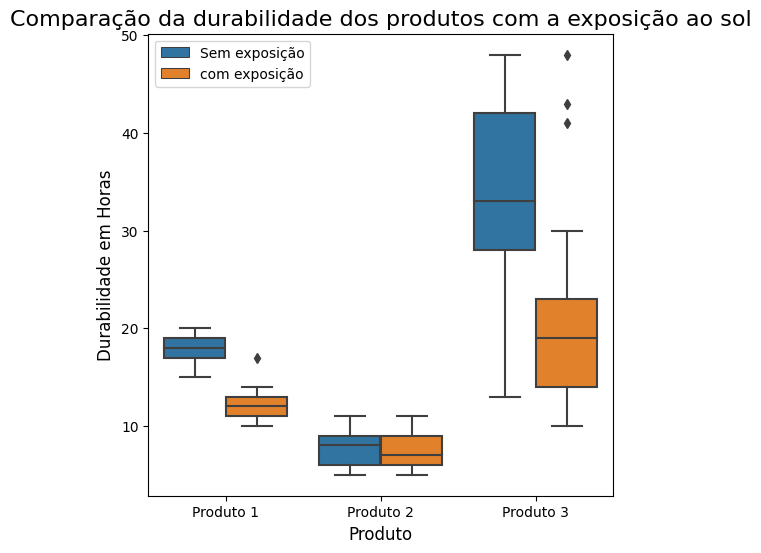

In [ ]:
## Boxplot para facilitar a visualização e comparação dos dados de durabilidade e exposição ao sol

ax = sns.boxplot(data=dados, x='id_produto', y='durabilidade', hue ='exposicao_sol')
ax.figure.set_size_inches(6, 6)
ax.set_title('Comparação da durabilidade dos produtos com a exposição ao sol', fontsize=16)
ax.set_xlabel('Produto', fontsize=12)
ax.set_ylabel('Durabilidade em Horas', fontsize=12)
ax.set_xticklabels(['Produto 1', 'Produto 2', 'Produto 3'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Sem exposição','com exposição'], fontsize=10)
ax

AVALIAÇÃO: é possível perceber que não existe uma grande dispersão dos dados para os produtos do tipo 1 e 2, diferente dos dados do produto 3, que possuem uma maior dispersão.

Levando em consideração a exposição ao sol e a não exposição, o produto 1 apresentou uma melhor durabilidade ao se comparar com o produto 2, em ambos os casos. E percebe-se que ele se comportou ainda melhor naqueles que não se expuseram ao sol.

Já o produto 3 foi o que demonstrou melhor performance, tanto nas pessoas que não foram expostas ao sol, quanto nas pessoas que foram. A diferença de durabilidade desse produto para os demais foi bem visível e significativa.

IDADE

In [ ]:
#Analisando a variação dos valores de idade
print('Idades variam de %s até %s' % (
    dados['idade'].min(), dados['idade'].max()))

Idades variam de 18 até 60


In [ ]:
#Idade média do dataset
dados['idade'].mean()

36.88666666666666

In [ ]:
# separando o dataset para idades abaixo e acima de 25 anos

amostra_prod_3_jovem = amostra_prod_3.query('idade <= 25')
amostra_prod_3_madura = amostra_prod_3.query('idade > 25')
n_prod_3_jovem =len(amostra_prod_3_jovem)
n_prod_3_madura =len(amostra_prod_3_madura)


 **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

$H_0$: Valores de durabilidade do público com menos de 25 anos é igual ao público de mais de 25 anos

$H_1$: Valores de durabilidade do público com menos de 25 anos é diferente ao público de mais de 25 anos

In [ ]:
#verificando tamanho das amostras
print('njovem = ', n_prod_3_jovem)
print('nmadura = ', n_prod_3_madura)

#Verificando se n>=30
if((n_prod_3_jovem + n_prod_3_madura) >= 30 ):
    print('Amostra com n>= 30')
else:
    print('Amostra com n< 30')

njovem =  34
nmadura =  27
Amostra com n>= 30


In [ ]:
# obtendo a média das amostras com relação à idade
media_amostra_jovem = amostra_prod_3_jovem['durabilidade'].mean()
media_amostra_madura = amostra_prod_3_madura['durabilidade'].mean()

print('Média amostra jovem = ', media_amostra_jovem)
print('Média amostra madura = ',media_amostra_madura)


Média amostra jovem =  35.73529411764706
Média amostra madura =  31.59259259259259


In [ ]:
# obtendo a desvio padrão das amostras com relação à idade
desvio_padrao_jovem = amostra_prod_3_jovem['durabilidade'].std()
desvio_padrao_madura = amostra_prod_3_madura['durabilidade'].std()

print('Desvio jovem = ', desvio_padrao_jovem)
print('Desvio madura = ', desvio_padrao_madura)

Desvio jovem =  7.080955352122496
Desvio madura =  10.838887465117509


In [ ]:
#calculando a estatistica-teste para as diferentes idades:
numerador = (media_amostra_jovem - media_amostra_madura) - D_0
denominador = np.sqrt((desvio_padrao_jovem ** 2 / n_prod_3_jovem )) +  (desvio_padrao_madura ** 2 / n_prod_3_madura)
z = numerador / denominador
z

0.7443485573900857

In [ ]:
#Verificando o critério do valor crítico para fórmulas 1 e 3:
if(z <= -z_alpha_2 or z >= z_alpha_2 ):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Aceitar H0


Conclusão: Com um nível de confiança de 95% aceitamos $H_0$, isto é, concluímos que a média da durabilidade da fórmula 3, incluindo a exposição ao sol, em jovens é igual à durabilidade em pessoas maduras

## 3- Qual fórmula de batom voce indicaria para consumidores que buscam maior durabilidade e exposição ao sol?

$H_0$: Não há diferença estatisticamente siginificativa na durabilidade entre as fórmulas 3 e 1 dos batons CONSIDERANDO exposição ao sol.

$H_1$: Há diferença estatisticamente siginificativa na durabilidade das fórmulas 3 e 1 dos batons CONSIDERANDO exposição ao sol.

In [ ]:
#calculando a estatistica-teste para as fórmulas 3 com exposição:
numerador = (media_amostra_prod_3 - media_amostra_prod_3_exp) - D_0
denominador = np.sqrt((desvio_padrao_amostra_prod_3 ** 2 / n_prod_3 )) +  (desvio_padrao_amostra_prod_3_exp ** 2 / n_prod_3_exp)
z = numerador / denominador
z

4.595439577164722

In [ ]:
#Verificando o critério do valor crítico para fórmulas 3 sem exposição:
if(z <= -z_alpha_2 or z >= z_alpha_2 ):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


Conclusão: Com um nível de confiança de 95% rejeitamos $H_0$, isto é, concluímos que a média da durabilidade da fórmula 3 não é igual à durabilidade da fórmula 1. Como a média da durabilidade da fórmula 3 é maior, podemos concluir que o batom com a fórmula 3 possui maior durabilidade sob exposição ao sol ou não. Por conta disso recomendaria a fórmula 3!

# **Desafio 2**

Imagine que voce trabalha em uma empresa do setor alimentício, e o preço de
determinado produto, um novo picolé, tem uma distribuição normal com média igual a
RS7,85 e desvio padrão igual a RS3,32. Suspeita-se que devido ao verão, em
determinadas localidades de praia o preco do picolé esteja mais caro.

Para verificar se esse efeito é estatisticamente significativo, contactaram voce, analista
de dados.
Suponha que para realizar essa análise voce tenha dados de 45 lojas em cidades do
litoral, escolhidas aleatoriamente. E constatou que o preço médio do picolé nessas
cidades é de RS11,52.


## 1. Você pode concluir que existe diferença de preços estatisticamente relevante com 5% de significância?




**Hipóteses:**

$H_0$: Não existe diferença significativa de preço ( μ1 = μ2 )

$H_1$: Existe diferença significativa de preço ( μ1 =! μ2 )


In [ ]:
## declaração das variáveis, segundo o enunciado

media = 7.85
sigma = 3.32
n = 45
media_amostras = 11.52
significancia = 0.05
confianca = 1 - significancia

In [ ]:
#fórmula para encontrar a probabilidade

probabilidade = (0.5 + (confianca/2))
probabilidade

0.975

In [ ]:
## encontrando o Z alpha

from scipy.stats import norm

z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

In [ ]:
## encontrando z

z = (media_amostras - media) / (sigma / np.sqrt(n))
z

7.415394106106231

In [ ]:
#Verificando o critério do valor crítico:

if(z <= -(z_alpha_2) or z >= z_alpha_2 ):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


CONCLUSÃO: a hipotese nula nos dizia que não existe uma diferença significativa. Com nossa análise estátistica, nós descartamos essa hipótese e concluimos que **existe uma diferença de preços relevante com 5% de significancia.**

## 2. Qual o valor da variável teste, o intervalo de confiança e o p-valor?

In [ ]:
## calculando variável teste
z

7.415394106106231

In [ ]:
## calculando intervalo de confiança (em reais preço mínimo e maximo)

intervalo = norm.interval(confidence=0.95, loc = media, scale = sigma/np.sqrt(n))
intervalo

(6.879981721761916, 8.820018278238082)

In [ ]:
## calculando p-valor

p_valor = 2 * (norm.sf(z))
p_valor

1.2126366281061861e-13

In [ ]:
#Verificando o critério do p_valor:
if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')



Rejeitar H0


Como rejeitou-se H0, conclui-se que o preço de 11.52 é absusivo (significativamente diferente) comparado às médias das outras lojas de sorvete, além de estar fora do intervalo de confiança

